In [1]:
pip install pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd

# 분석할 파일 목록
file_paths = {
    '이재명': 'https://raw.githubusercontent.com/hyeriiiiinnn/KORE208_team5/main/4.%20TF-IDF/lee_jaemyung_tagged_filtered.csv',
    '김문수': 'https://raw.githubusercontent.com/hyeriiiiinnn/KORE208_team5/main/4.%20TF-IDF/kim_moonsu_tagged_filtered.csv',
    '이준석': 'https://raw.githubusercontent.com/hyeriiiiinnn/KORE208_team5/main/4.%20TF-IDF/lee_junseok_tagged_filtered_ver2.csv'
}

documents = {}

# 파일별로 텍스트 추출
for name, path in file_paths.items():
    df = pd.read_csv(path)
    docs = []
    for sentence in df['tagged'].dropna():
        tokens = []
        for token in sentence.split():
            if '(' in token and ')' in token:
                word = token.rsplit("(", 1)[0]
                tokens.append(word)  # ✅ 이 줄이 필수!
        docs.append(" ".join(tokens))
    documents[name] = " ".join(docs)


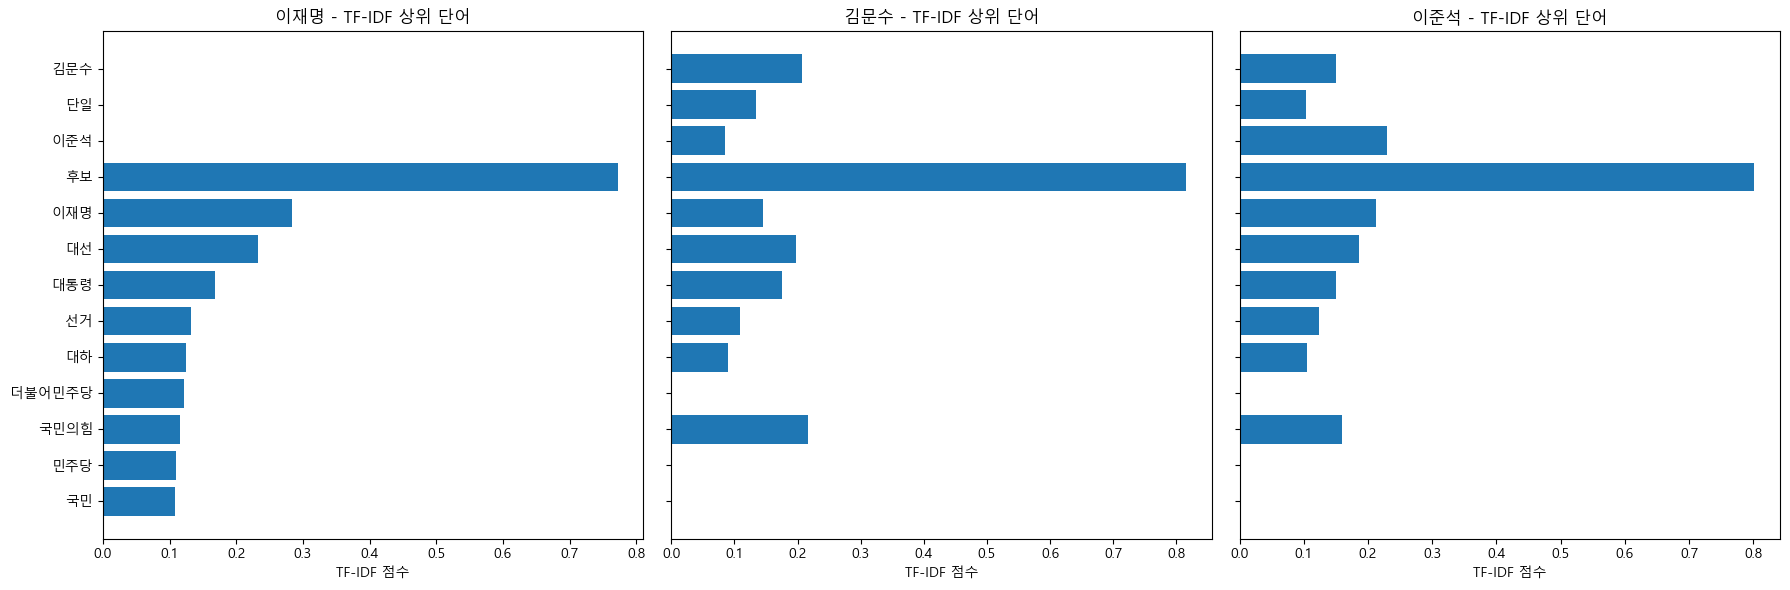

In [5]:
# TF-IDF 분석
corpus = list(documents.values())
names = list(documents.keys())
vectorizer = TfidfVectorizer(max_features=100)
X = vectorizer.fit_transform(corpus)
df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=names)

# 시각화
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import matplotlib as mpl

    # 폰트 설정
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, name in enumerate(df_tfidf.index):
    top_terms = df_tfidf.loc[name].sort_values(ascending=False).head(10)
    axes[i].barh(top_terms.index[::-1], top_terms.values[::-1])
    axes[i].set_title(f"{name} - TF-IDF 상위 단어")
    axes[i].set_xlabel("TF-IDF 점수")

plt.tight_layout()
plt.show()

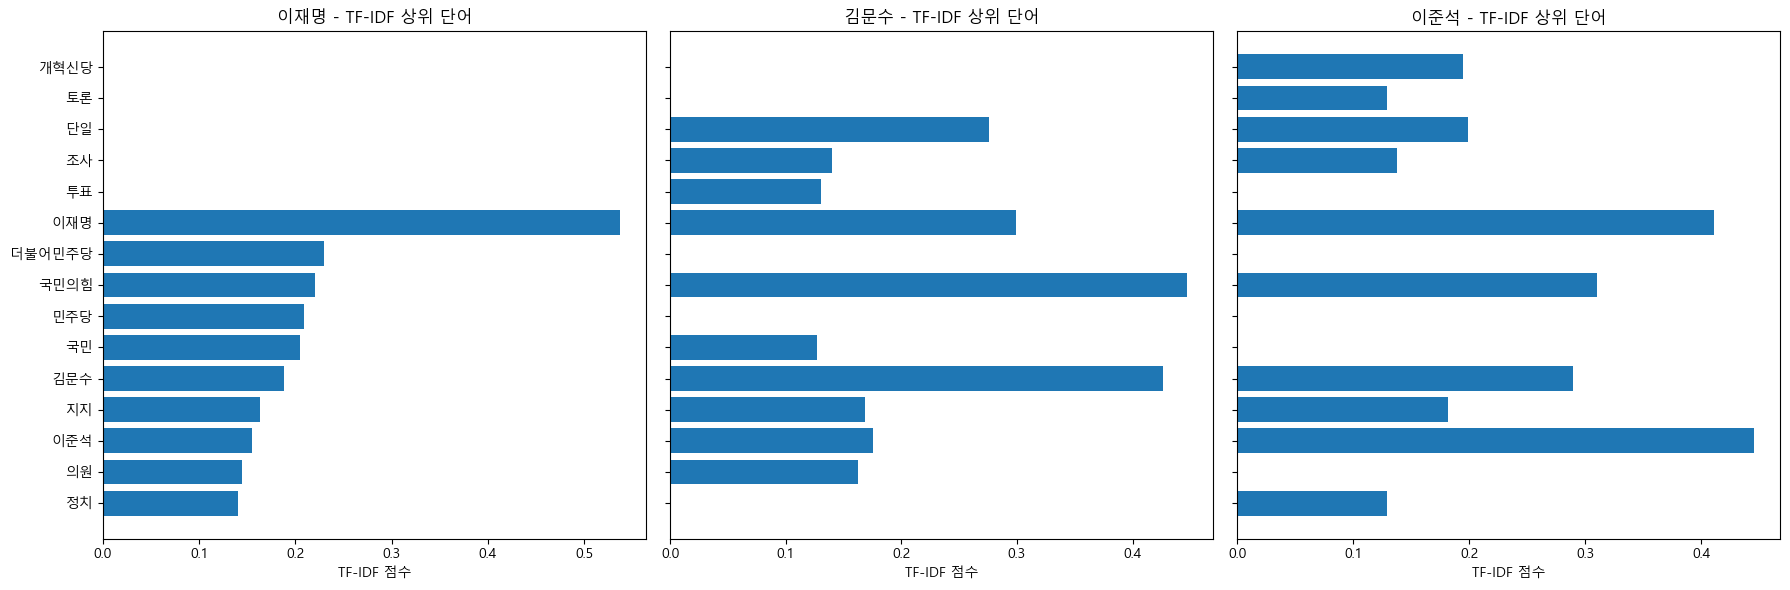

In [6]:
# TF-IDF 2번째 시도; 공통 단어들 제거
corpus2 = list(documents.values())
names2 = list(documents.keys())

from sklearn.feature_extraction.text import TfidfVectorizer

# 사용자 정의 불용어 리스트
custom_stopwords = ['후보', '대선', '대통령', '선거', '후보', '대하', '아니', '이날', '위하']

# TF-IDF 벡터라이저 정의
vectorizer = TfidfVectorizer(max_features=100, stop_words=custom_stopwords)
X = vectorizer.fit_transform(corpus2)

# 이후 코드는 동일
df_tfidf2 = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=names2)

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, name in enumerate(df_tfidf2.index):
    top_terms = df_tfidf2.loc[name].sort_values(ascending=False).head(10)
    axes[i].barh(top_terms.index[::-1], top_terms.values[::-1])
    axes[i].set_title(f"{name} - TF-IDF 상위 단어")
    axes[i].set_xlabel("TF-IDF 점수")

plt.tight_layout()
plt.show()

In [7]:
# 고유 키워드 추출
## 특정 정치인에게만 특이하게 높은 TF-IDF를 보이는 단어를 구분

# 기존 TF-IDF 결과가 담긴 DataFrame: df_tfidf2
# 각 행: 정치인 이름, 각 열: 단어+품사 조합, 값: TF-IDF 점수

# 고유 키워드: 특정 정치인에서만 TF-IDF가 유독 높은 단어
for name in df_tfidf2.index:
    dominant_words = df_tfidf2.loc[name] - df_tfidf2.drop(index=name).mean()
    print(f"\n{name}의 고유 키워드:")
    print(dominant_words.sort_values(ascending=False).head(10))




이재명의 고유 키워드:
이재명       0.182193
더불어민주당    0.132874
민주당       0.110217
법원        0.109796
사건        0.100849
국민        0.095200
재판        0.079775
선거법       0.056865
내란        0.048576
발언        0.030497
dtype: float64

김문수의 고유 키워드:
김문수     0.187063
국민의힘    0.181778
단일      0.143417
한덕수     0.071051
경선      0.063846
투표      0.060590
의원      0.050145
사전      0.025583
오후      0.021872
만나      0.018869
dtype: float64

이준석의 고유 키워드:
이준석     0.279923
개혁신당    0.131249
토론      0.081103
공약      0.041925
tv      0.040315
토론회     0.036720
단일      0.028890
보수      0.018242
정책      0.018095
여성      0.017955
dtype: float64


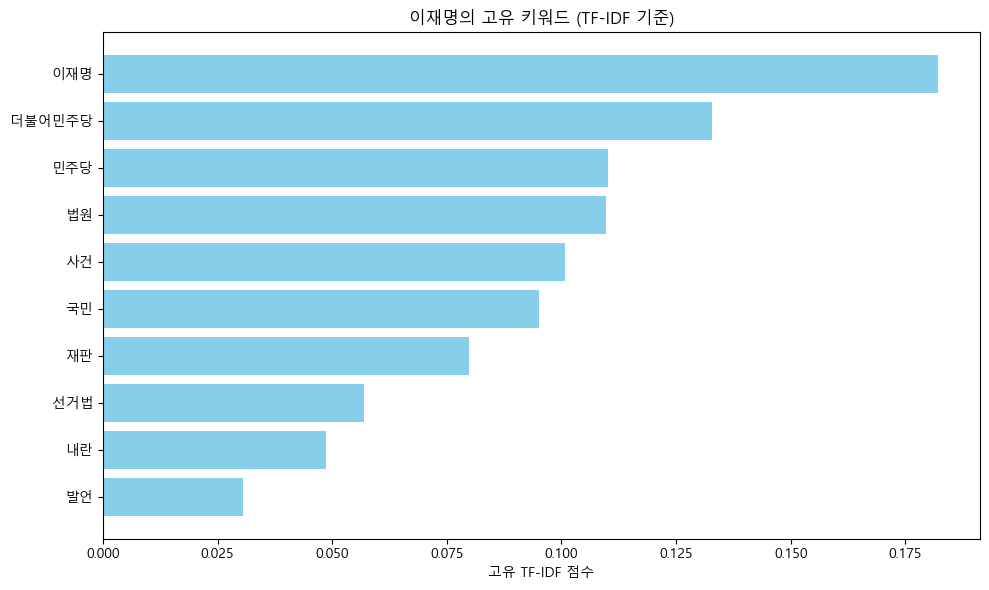

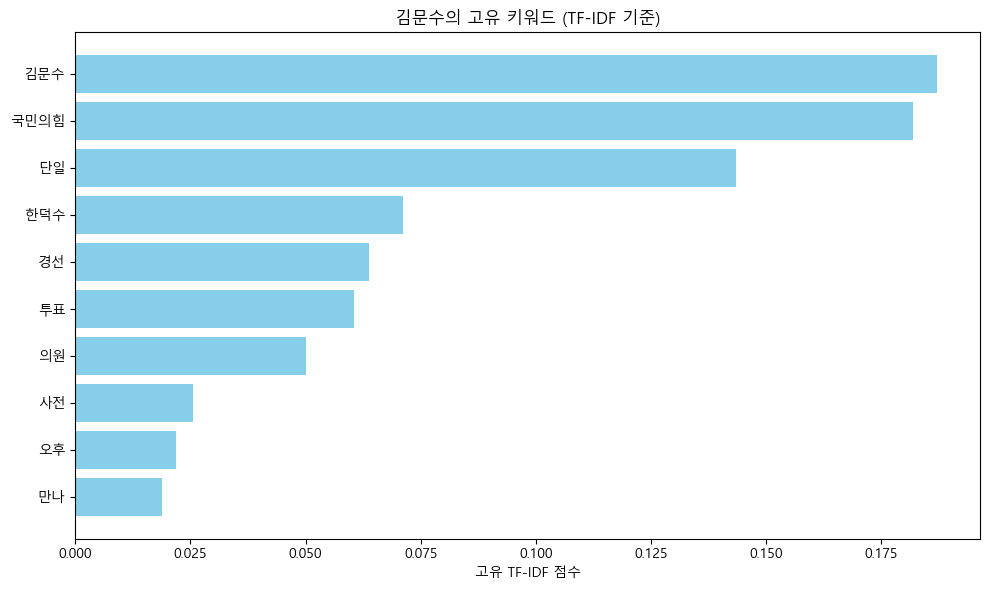

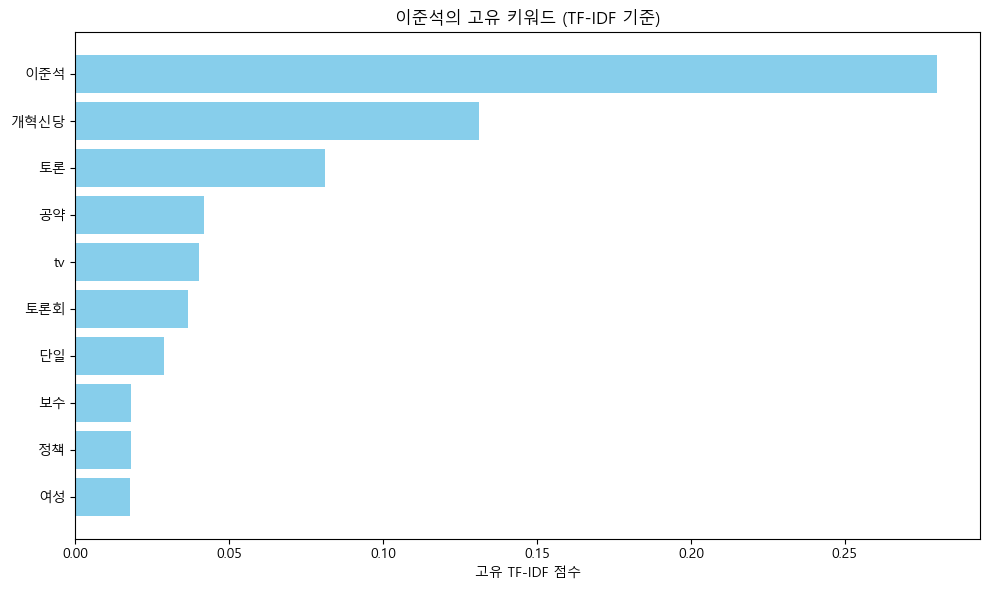

In [ ]:
# 고유 키워드 10개 시각화

# 한글 폰트 설정
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# 시각화: 정치인별 고유 키워드 상위 10개
for name in df_tfidf2.index:
    # 고유성 계산: 해당 정치인의 TF-IDF - (다른 정치인 평균)
    dominant_words = df_tfidf2.loc[name] - df_tfidf2.drop(index=name).mean()
    top_dominant = dominant_words.sort_values(ascending=False).head(10)
    
    # 시각화
    plt.figure(figsize=(10, 6))
    plt.barh(top_dominant.index[::-1], top_dominant.values[::-1], color="skyblue")
    plt.title(f"{name}의 고유 키워드 (TF-IDF 기준)")
    plt.xlabel("고유 TF-IDF 점수")
    plt.tight_layout()
    plt.show()


이재명의 고유 키워드:
이재명       0.182193
더불어민주당    0.132874
민주당       0.110217
법원        0.109796
사건        0.100849
국민        0.095200
재판        0.079775
선거법       0.056865
내란        0.048576
발언        0.030497
통합        0.030322
지역        0.027981
정치        0.027972
밝히        0.025053
의원        0.023324
dtype: float64

김문수의 고유 키워드:
김문수     0.187063
국민의힘    0.181778
단일      0.143417
한덕수     0.071051
경선      0.063846
투표      0.060590
의원      0.050145
사전      0.025583
오후      0.021872
만나      0.018869
윤석열     0.017159
탄핵      0.016881
여론      0.016805
위원장     0.015415
대책      0.013701
dtype: float64

이준석의 고유 키워드:
이준석     0.279923
개혁신당    0.131249
토론      0.081103
공약      0.041925
tv      0.040315
토론회     0.036720
단일      0.028890
보수      0.018242
정책      0.018095
여성      0.017955
지지      0.015700
경제      0.013877
사회      0.011670
정치      0.011203
질문      0.010293
dtype: float64


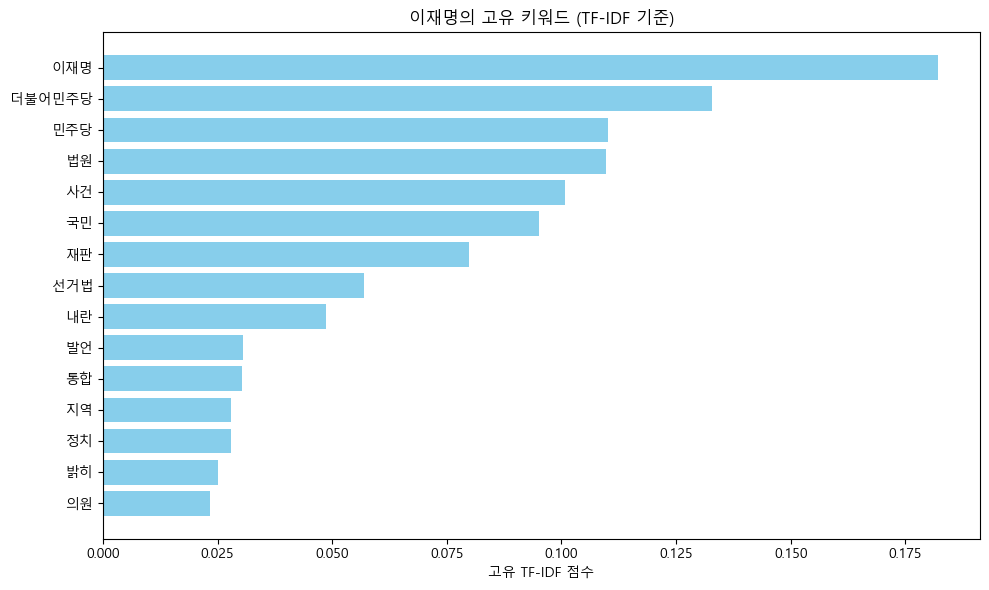

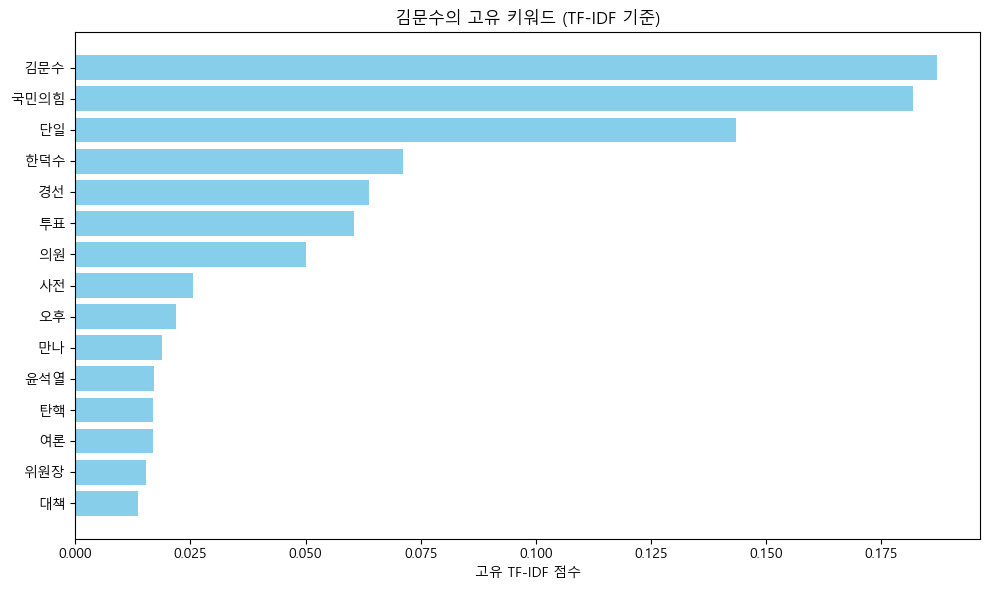

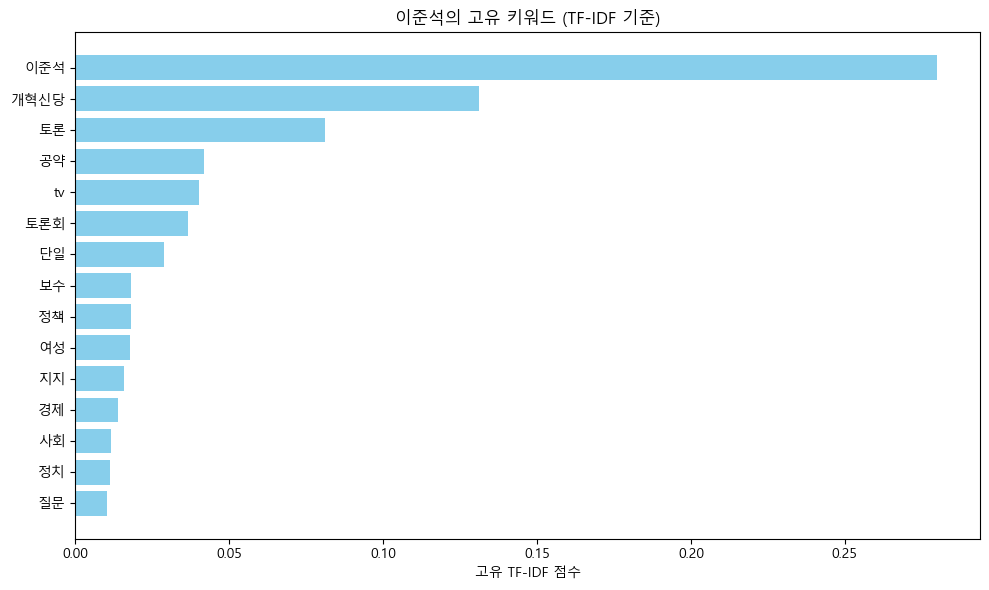

In [ ]:
# 고유 키워드 추출 (15개)

    # 사용자 정의 불용어 설정
custom_stopwords = {"이런", "그런"}

for name in df_tfidf2.index:
    # TF-IDF 점수에서 다른 후보 평균을 뺀 값 → 고유성 점수
    dominant_words = df_tfidf2.loc[name] - df_tfidf2.drop(index=name).mean()
    
    # 불용어 제거
    dominant_words = dominant_words[~dominant_words.index.isin(custom_stopwords)]
    
    # 상위 15개 고유 키워드 출력
    print(f"\n{name}의 고유 키워드:")
    print(dominant_words.sort_values(ascending=False).head(15))

# 한글 폰트 설정
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# 시각화: 정치인별 고유 키워드 상위 15개
for name in df_tfidf2.index:
    dominant_words = df_tfidf2.loc[name] - df_tfidf2.drop(index=name).mean()
    
    # ✅ 여기에도 불용어 제거 적용!
    dominant_words = dominant_words[~dominant_words.index.isin(custom_stopwords)]
    
    top_dominant = dominant_words.sort_values(ascending=False).head(15)

    # 시각화
    plt.figure(figsize=(10, 6))
    plt.barh(top_dominant.index[::-1], top_dominant.values[::-1], color="skyblue")
    plt.title(f"{name}의 고유 키워드 (TF-IDF 기준)")
    plt.xlabel("고유 TF-IDF 점수")
    plt.tight_layout()
    plt.show()


In [ ]:
#############################################

정치인별 TF 상위 15개 단어:

[이재명]
이재명: 11762
더불어민주당: 5032
국민의힘: 4829
민주당: 4578
국민: 4493
김문수: 4125
지지: 3567
이준석: 3397
의원: 3167
정치: 3073
법원: 2753
밝히: 2613
조사: 2592
사건: 2549
서울: 2533

[김문수]
국민의힘: 10909
김문수: 10395
이재명: 7302
단일: 6723
이준석: 4285
지지: 4120
의원: 3966
조사: 3408
투표: 3192
국민: 3102
서울: 2958
밝히: 2524
기자: 2465
한덕수: 2407
대표: 2403

[이준석]
이준석: 5311
이재명: 4902
국민의힘: 3699
김문수: 3454
단일: 2376
개혁신당: 2321
지지: 2166
조사: 1644
정치: 1541
토론: 1536
공약: 1307
서울: 1259
더불어민주당: 1249
민주당: 1192
기자: 1164


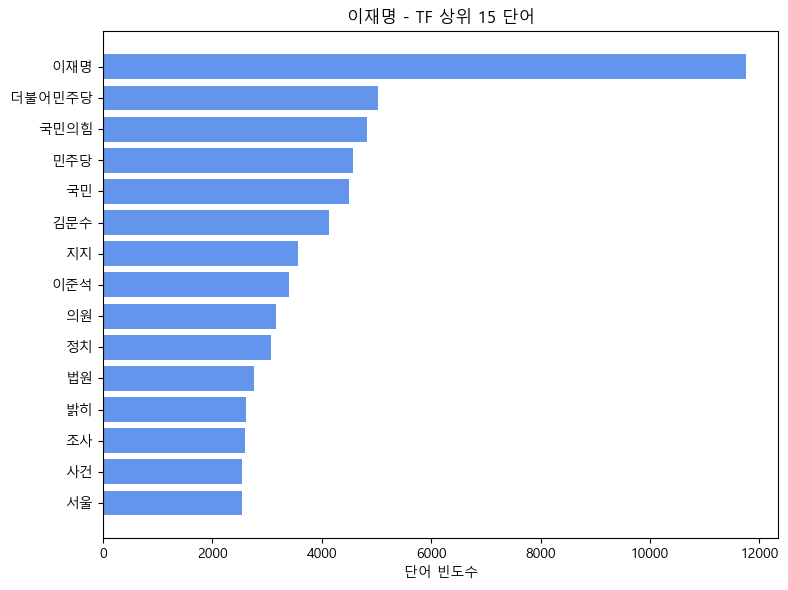

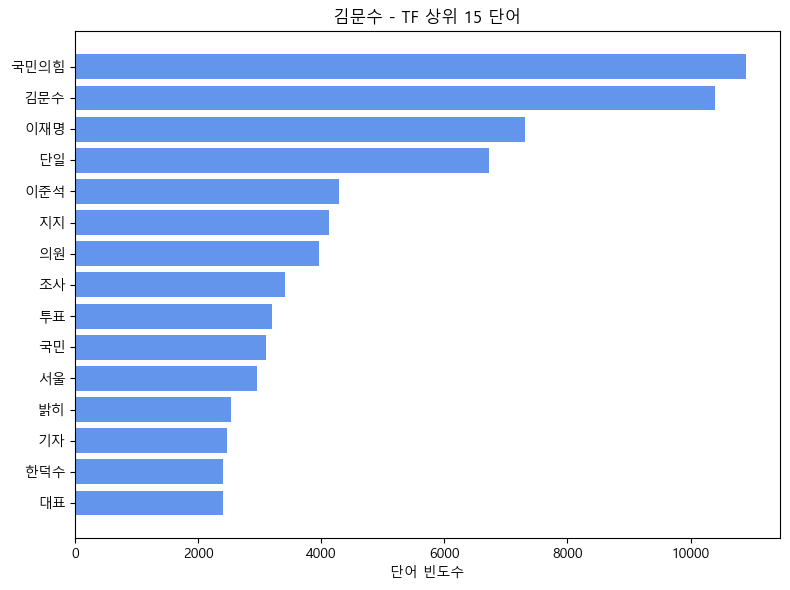

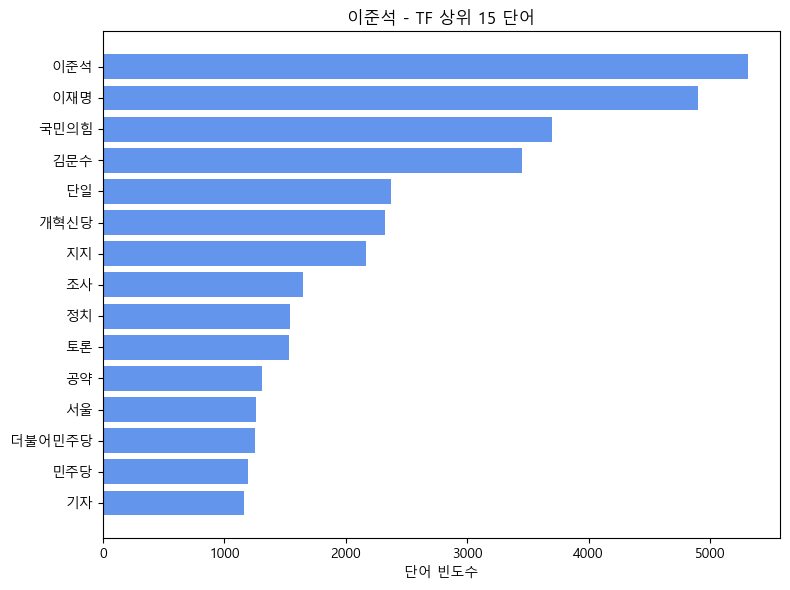

In [12]:
# 단순 빈도 (TF) 불용어 지정 및 텍스트 불러오기

# 불용어
custom_stopwords = ['후보', '대선', '대통령', '선거', '대하', '아니', '이날', '위하']

def remove_stopwords(text, stopwords):
    tokens = text.split()
    filtered_tokens = [t for t in tokens if t not in stopwords]
    return " ".join(filtered_tokens)

# 불용어 제거
corpus_tf = []
for name in names:
    cleaned_text = remove_stopwords(documents[name], custom_stopwords)
    corpus_tf.append(cleaned_text)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

if not isinstance(custom_stopwords, list):
    custom_stopwords = list(custom_stopwords)

# TF 벡터 생성
tf_vectorizer = CountVectorizer(max_features=100, stop_words=None)
tf_X = tf_vectorizer.fit_transform(corpus_tf)
df_tf = pd.DataFrame(tf_X.toarray(), columns=tf_vectorizer.get_feature_names_out(), index=names)

# 정치인별 TF 상위 15개 단어 출력
print("정치인별 TF 상위 15개 단어:")
for name in names:
    top_15 = df_tf.loc[name].sort_values(ascending=False).head(15)
    print(f"\n[{name}]")
    for word, freq in top_15.items():
        print(f"{word}: {freq}")


# 정치인별 TF 상위 15 단어 시각화

# 한글 폰트 설정 (Windows 기준)
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

for name in names:
    top_15 = df_tf.loc[name].sort_values(ascending=False).head(15)
    
    plt.figure(figsize=(8, 6))
    plt.barh(top_15.index[::-1], top_15.values[::-1], color='cornflowerblue')
    plt.title(f"{name} - TF 상위 15 단어")
    plt.xlabel("단어 빈도수")
    plt.tight_layout()
    plt.show()



[TF 상위 15개 단어와 고유 키워드(TF-IDF 기준) 상위 15개 단어의 일치율 - 불용어 제거 없음]

이재명:
  TF 상위 15 단어: ['국민', '국민의힘', '김문수', '더불어민주당', '민주당', '밝히', '법원', '사건', '서울', '의원', '이재명', '이준석', '정치', '조사', '지지']
  고유 키워드 15개: ['국민', '내란', '더불어민주당', '민주당', '발언', '밝히', '법원', '사건', '선거법', '의원', '이재명', '재판', '정치', '지역', '통합']
  일치 단어 (9개): ['국민', '더불어민주당', '민주당', '밝히', '법원', '사건', '의원', '이재명', '정치']
  TF에만 있는 단어: ['국민의힘', '김문수', '서울', '이준석', '조사', '지지']
  고유 키워드에만 있는 단어: ['내란', '발언', '선거법', '재판', '지역', '통합']
  일치율 = 0.60

김문수:
  TF 상위 15 단어: ['국민', '국민의힘', '기자', '김문수', '단일', '대표', '밝히', '서울', '의원', '이재명', '이준석', '조사', '지지', '투표', '한덕수']
  고유 키워드 15개: ['경선', '국민의힘', '김문수', '단일', '대책', '만나', '사전', '여론', '오후', '위원장', '윤석열', '의원', '탄핵', '투표', '한덕수']
  일치 단어 (6개): ['국민의힘', '김문수', '단일', '의원', '투표', '한덕수']
  TF에만 있는 단어: ['국민', '기자', '대표', '밝히', '서울', '이재명', '이준석', '조사', '지지']
  고유 키워드에만 있는 단어: ['경선', '대책', '만나', '사전', '여론', '오후', '위원장', '윤석열', '탄핵']
  일치율 = 0.40

이준석:
  TF 상위 15 단어: ['개혁신당', '공약', '국민의힘', '기자', '김문수', '단일',

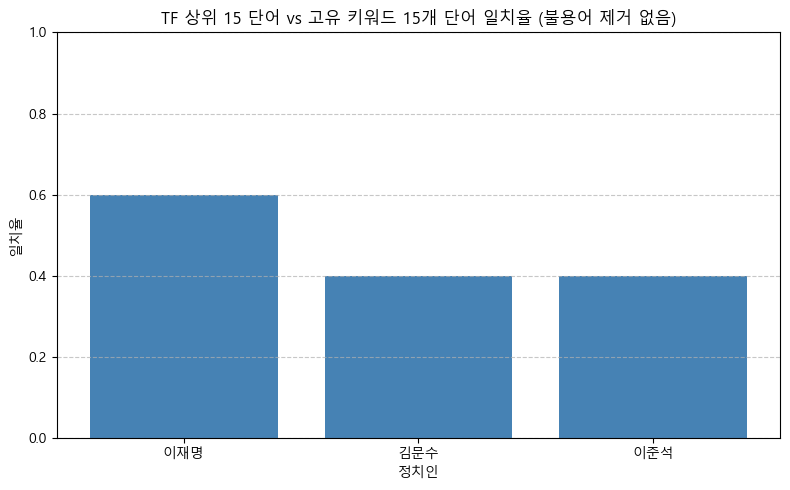

In [ ]:
match_ratios = []

print("\n[TF 상위 15개 단어와 고유 키워드(TF-IDF 기준) 상위 15개 단어의 일치율 - 불용어 제거 없음]")

for name in names:
    # TF 상위 15 단어
    tf_top15 = set(df_tf.loc[name].sort_values(ascending=False).head(15).index)

    # 고유 TF-IDF 점수 계산 (불용어 제거 없이)
    dominant_words = df_tfidf2.loc[name] - df_tfidf2.drop(index=name).mean()
    tfidf_top15 = set(dominant_words.sort_values(ascending=False).head(15).index)

    # 교집합 및 일치율 계산
    intersection = tf_top15 & tfidf_top15
    tf_only = tf_top15 - intersection
    tfidf_only = tfidf_top15 - intersection
    match_ratio = len(intersection) / 15
    match_ratios.append(match_ratio)

    # 출력
    print(f"\n{name}:")
    print(f"  TF 상위 15 단어: {sorted(tf_top15)}")
    print(f"  고유 키워드 15개: {sorted(tfidf_top15)}")
    print(f"  일치 단어 ({len(intersection)}개): {sorted(intersection)}")
    print(f"  TF에만 있는 단어: {sorted(tf_only)}")
    print(f"  고유 키워드에만 있는 단어: {sorted(tfidf_only)}")
    print(f"  일치율 = {match_ratio:.2f}")

# 시각화
plt.figure(figsize=(8, 5))
plt.bar(names, match_ratios, color='steelblue')
plt.ylim(0, 1)
plt.title('TF 상위 15 단어 vs 고유 키워드 15개 단어 일치율 (불용어 제거 없음)')
plt.ylabel('일치율')
plt.xlabel('정치인')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



[TF 상위 15개 단어와 고유 키워드(TF-IDF 기준) 상위 15개 단어의 일치율 - 불용어 추가]

이재명:
  TF 상위 15 단어: ['국민', '국민의힘', '김문수', '더불어민주당', '민주당', '밝히', '법원', '사건', '서울', '의원', '이재명', '이준석', '정치', '조사', '지지']
  고유 키워드 15개: ['국민', '내란', '더불어민주당', '민주당', '발언', '밝히', '법원', '사건', '선거법', '의원', '이재명', '재판', '정치', '지역', '통합']
  일치 단어 (9개): ['국민', '더불어민주당', '민주당', '밝히', '법원', '사건', '의원', '이재명', '정치']
  TF에만 있는 단어: ['국민의힘', '김문수', '서울', '이준석', '조사', '지지']
  고유 키워드에만 있는 단어: ['내란', '발언', '선거법', '재판', '지역', '통합']
  일치율 = 0.60

김문수:
  TF 상위 15 단어: ['국민', '국민의힘', '기자', '김문수', '단일', '대표', '밝히', '서울', '의원', '이재명', '이준석', '조사', '지지', '투표', '한덕수']
  고유 키워드 15개: ['경선', '국민의힘', '김문수', '단일', '대책', '만나', '사전', '여론', '오후', '위원장', '윤석열', '의원', '탄핵', '투표', '한덕수']
  일치 단어 (6개): ['국민의힘', '김문수', '단일', '의원', '투표', '한덕수']
  TF에만 있는 단어: ['국민', '기자', '대표', '밝히', '서울', '이재명', '이준석', '조사', '지지']
  고유 키워드에만 있는 단어: ['경선', '대책', '만나', '사전', '여론', '오후', '위원장', '윤석열', '탄핵']
  일치율 = 0.40

이준석:
  TF 상위 15 단어: ['개혁신당', '공약', '국민의힘', '기자', '김문수', '단일', '더

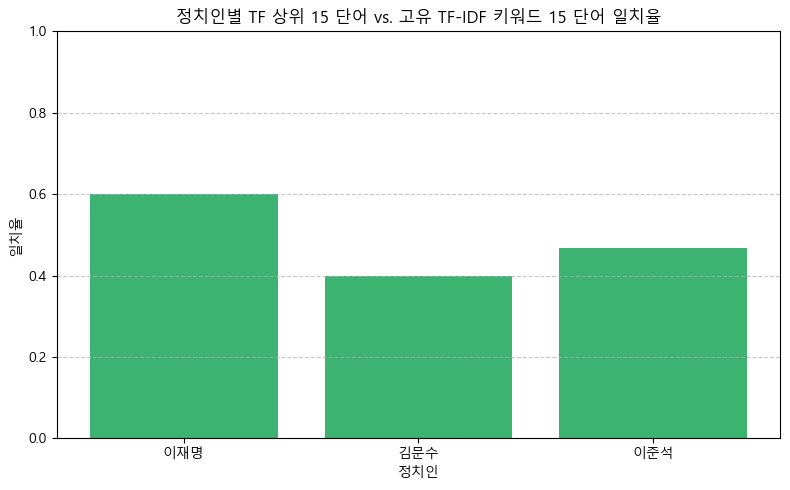

In [15]:
# 사용자 정의 불용어 추가 (이런, 그런)
custom_stopwords = {"이런", "그런"}

match_ratios = []

print("\n[TF 상위 15개 단어와 고유 키워드(TF-IDF 기준) 상위 15개 단어의 일치율 - 불용어 추가]")

for name in names:
    # TF 상위 15 단어
    tf_top15 = set(df_tf.loc[name].sort_values(ascending=False).head(15).index)

    # 고유 TF-IDF 점수 계산: 자기 - 나머지 평균
    dominant_words = df_tfidf2.loc[name] - df_tfidf2.drop(index=name).mean()
    dominant_words = dominant_words[~dominant_words.index.isin(custom_stopwords)]
    tfidf_top15 = set(dominant_words.sort_values(ascending=False).head(15).index)

    # 교집합 및 일치율 계산
    intersection = tf_top15 & tfidf_top15
    tf_only = tf_top15 - intersection
    tfidf_only = tfidf_top15 - intersection
    match_ratio = len(intersection) / 15
    match_ratios.append(match_ratio)

    # 출력
    print(f"\n{name}:")
    print(f"  TF 상위 15 단어: {sorted(tf_top15)}")
    print(f"  고유 키워드 15개: {sorted(tfidf_top15)}")
    print(f"  일치 단어 ({len(intersection)}개): {sorted(intersection)}")
    print(f"  TF에만 있는 단어: {sorted(tf_only)}")
    print(f"  고유 키워드에만 있는 단어: {sorted(tfidf_only)}")
    print(f"  일치율 = {match_ratio:.2f}")

# 시각화
plt.figure(figsize=(8, 5))
plt.bar(names, match_ratios, color='mediumseagreen')
plt.ylim(0, 1)
plt.title('정치인별 TF 상위 15 단어 vs. 고유 TF-IDF 키워드 15 단어 일치율')
plt.ylabel('일치율')
plt.xlabel('정치인')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


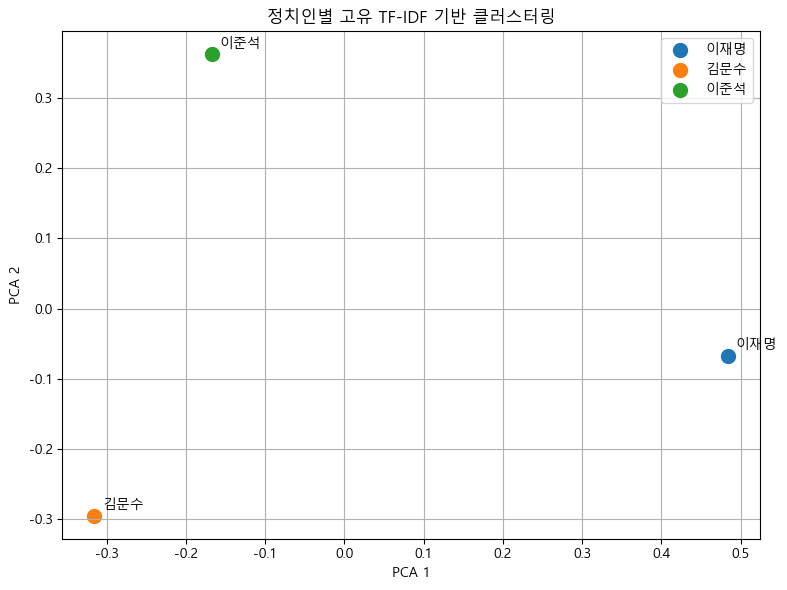

In [ ]:
#TF-IDF 고유 키워드를 벡터로 2차원에 표현
#목표: 정치인별로 얼마나 다르게 언론 묘사되고 있는지

# 1. 고유 TF-IDF 점수 계산: 각 정치인 벡터 = 자기 점수 - 타 정치인 평균
dominant_vectors = {}
for name in df_tfidf2.index:
    dominant_vector = df_tfidf2.loc[name] - df_tfidf2.drop(index=name).mean()
    dominant_vectors[name] = dominant_vector

# 2. DataFrame으로 변환
df_dominant = pd.DataFrame(dominant_vectors).T.fillna(0)

# 3. 차원 축소 (시각화를 위해 PCA 2D)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_dominant.values)

# 4. 클러스터링 (예: 정치인 수만큼 k)
k = len(df_dominant)
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(df_dominant.values)

# 5. 시각화
plt.figure(figsize=(8, 6))
for i, name in enumerate(df_dominant.index):
    plt.scatter(pca_result[i, 0], pca_result[i, 1], label=name, s=100)
    plt.text(pca_result[i, 0]+0.01, pca_result[i, 1]+0.01, name)

plt.title("정치인별 고유 TF-IDF 기반 클러스터링")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


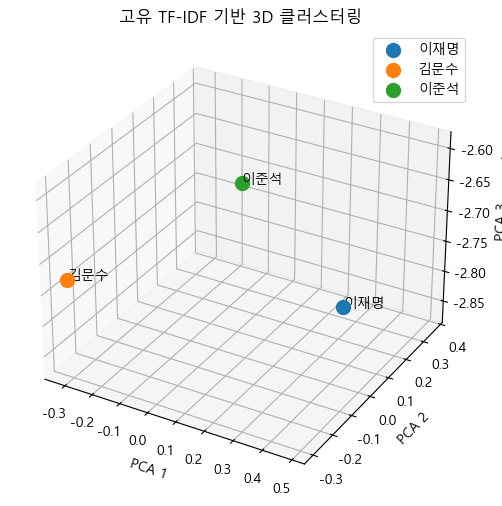

In [19]:
# 같은 것을 3D로 표현
 
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# 3차원 PCA
pca_3d = PCA(n_components=3)
pca_result = pca_3d.fit_transform(df_dominant.values)

# 시각화
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

for i, name in enumerate(df_dominant.index):
    ax.scatter(pca_result[i, 0], pca_result[i, 1], pca_result[i, 2], s=100, label=name)
    ax.text(pca_result[i, 0], pca_result[i, 1], pca_result[i, 2], name)

ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.title("고유 TF-IDF 기반 3D 클러스터링")
plt.legend()
plt.show()


In [29]:
# 고유 키워드 리스트와 함께 보이는 시각화 (label overlay)

import plotly.graph_objects as go
from sklearn.decomposition import PCA

# 1. 고유 TF-IDF 벡터 계산
dominant_vectors = {}
top_words_dict = {}

for name in df_tfidf2.index:
    dominant = df_tfidf2.loc[name] - df_tfidf2.drop(index=name).mean()
    dominant_vectors[name] = dominant

    # 고유 키워드 15개 저장
    top_words = dominant.sort_values(ascending=False).head(15)
    top_words_dict[name] = top_words

df_dominant = pd.DataFrame(dominant_vectors).T.fillna(0)

# 2. PCA 2D 축소
pca = PCA(n_components=2)
pca_coords = pca.fit_transform(df_dominant.values)
pca_df = pd.DataFrame(pca_coords, columns=['PCA1', 'PCA2'], index=df_dominant.index)

# 3. 정치인 점과 텍스트 각각 표시
fig = go.Figure()

# (1) 정치인 점
for name in pca_df.index:
    fig.add_trace(go.Scatter(
        x=[pca_df.loc[name, 'PCA1']],
        y=[pca_df.loc[name, 'PCA2']],
        mode='markers+text',
        marker=dict(size=10),
        text=[name],
        textposition="top center",
        name=name,
        hoverinfo='text',
        showlegend=False
    ))

# (2) 고유 키워드들 흩뿌리기
for name in pca_df.index:
    x_base, y_base = pca_df.loc[name, 'PCA1'], pca_df.loc[name, 'PCA2']
    top_words = top_words_dict[name]

    for i, (word, score) in enumerate(top_words.items()):
        dx = 0.015 * ((i % 5) - 2)  # -2 ~ +2
        dy = 0.03 * (i // 5 - 1)    # 세 줄로 퍼뜨리기

        fig.add_trace(go.Scatter(
            x=[x_base + dx],
            y=[y_base + dy],
            mode='text',
            text=[word],
            textfont=dict(size=10, color='gray'),
            hovertemplate=f"<b>{word}</b><br>TF-IDF 고유성 점수: {score:.3f}<extra></extra>",
            showlegend=False
        ))

# 4. 마무리 설정
fig.update_layout(
    title="정치인 주변 고유 키워드 (hover 강조)",
    xaxis_title="PCA 1",
    yaxis_title="PCA 2",
    width=900,
    height=700
)

fig.show()




[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[정치인 간 TF-IDF 기반 코사인 유사도]
          이재명       김문수       이준석
이재명  1.000000  0.846308  0.864627
김문수  0.846308  1.000000  0.898912
이준석  0.864627  0.898912  1.000000


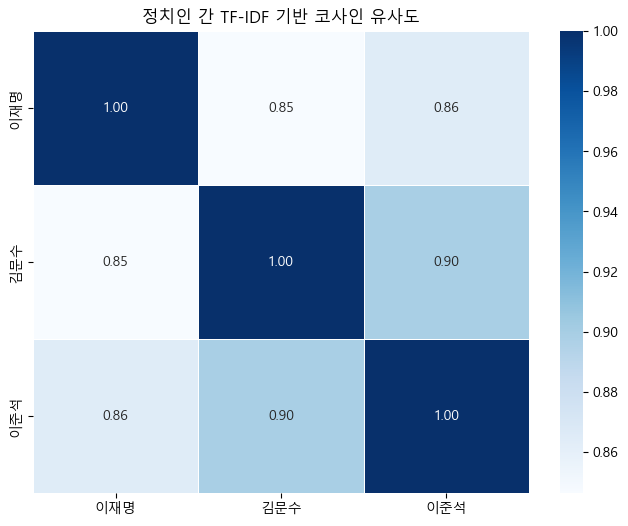

In [22]:
#정치인 간 TF-IDF 기반 코사인 유사도 분석

from sklearn.metrics.pairwise import cosine_similarity

!pip install seaborn
import seaborn as sns

# 코사인 유사도 계산
cos_sim_matrix = cosine_similarity(df_tfidf2.values)

# 결과를 DataFrame으로 보기 좋게 정리
df_cos_sim = pd.DataFrame(cos_sim_matrix, index=names, columns=names)

print("\n[정치인 간 TF-IDF 기반 코사인 유사도]")
print(df_cos_sim)

plt.figure(figsize=(8, 6))
sns.heatmap(df_cos_sim, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title('정치인 간 TF-IDF 기반 코사인 유사도')
plt.show()
